In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc as pm
import scipy.stats as sps

sns.set()

confirmed_min = 0
dead_min = 50

In [9]:
us_state_dict = pd.read_pickle('us_state_dict.pkl')
ny = us_state_dict['New York']
ny

confirmed  deceased  recovered      inc  dead_inc    factor  \
date                                                                      
2020-03-10      173.0       0.0        0.0      NaN       NaN       NaN   
2020-03-11      220.0       0.0        0.0     47.0       0.0  1.271676   
2020-03-12      328.0       0.0        0.0    108.0       0.0  1.490909   
2020-03-13      421.0       0.0        0.0     93.0       0.0  1.283537   
2020-03-14      525.0       2.0        0.0    104.0       2.0  1.247031   
2020-03-15      732.0       3.0        0.0    207.0       1.0  1.394286   
2020-03-16      967.0      10.0        0.0    235.0       7.0  1.321038   
2020-03-17     1706.0      13.0        0.0    739.0       3.0  1.764219   
2020-03-18     2495.0      16.0        0.0    789.0       3.0  1.462485   
2020-03-19     5365.0      34.0        0.0   2870.0      18.0  2.150301   
2020-03-20     8310.0      42.0        0.0   2945.0       8.0  1.548928   
2020-03-21    11710.0      60.0        0.0   3400.0      18.0  1.409146   
2020-03-22    15800.0     117.0        0.0   4090.0      57.0  1.349274   
2020-03-23    20884.0     158.0        0.0   5084.0      41.0  1.321772   
2020-03-24    25681.0     210.0        0.0   4797.0      52.0  1.229697   
2020-03-25    30841.0     285.0        0.0   5160.0      75.0  1.200927   
2020-03-26    37877.0     385.0        0.0   7036.0     100.0  1.228138   
2020-03-27    44876.0     527.0        0.0   6999.0     142.0  1.184782   
2020-03-28    52410.0     728.0        0.0   7534.0     201.0  1.167885   
2020-03-29    59648.0     965.0        0.0   7238.0     237.0  1.138103   
2020-03-30    66663.0    1218.0        0.0   7015.0     253.0  1.117607   
2020-03-31    75833.0    1550.0        0.0   9170.0     332.0  1.137558   
2020-04-01    83948.0    1941.0        0.0   8115.0     391.0  1.107011   
2020-04-02    92506.0    2373.0        0.0   8558.0     432.0  1.101944   
2020-04-03   102987.0    2935.0        0.0  10481.0     562.0  1.113301   
2020-04-04   113833.0    3565.0        0.0  10846.0     630.0  1.105314   
2020-04-05   123160.0    4159.0        0.0   9327.0     594.0  1.081936   
2020-04-06   131815.0    4698.0        0.0   8655.0     539.0  1.070274   
2020-04-07   139875.0    5489.0        0.0   8060.0     791.0  1.061146   
2020-04-08   151061.0    6268.0        0.0  11186.0     779.0  1.079971   
2020-04-09   161779.0    7067.0        0.0  10718.0     799.0  1.070951   
2020-04-10   172348.0    7867.0        0.0  10569.0     800.0  1.065330   
2020-04-11   181026.0    8627.0        0.0   8678.0     760.0  1.050352   
2020-04-12   189033.0    9385.0        0.0   8007.0     758.0  1.044231   
2020-04-13   195749.0   10058.0        0.0   6716.0     673.0  1.035528   

            dead_factor      density  population  growth    gdp    conf_per_M  \
date                                                                            
2020-03-10          NaN  1068.424744    19440469 -0.0052  89076      8.898962   
2020-03-11          NaN  1068.424744    19440469 -0.0052  89076     11.316599   
2020-03-12          NaN  1068.424744    19440469 -0.0052  89076     16.872021   
2020-03-13          NaN  1068.424744    19440469 -0.0052  89076     21.655856   
2020-03-14          NaN  1068.424744    19440469 -0.0052  89076     27.005521   
2020-03-15     1.500000  1068.424744    19440469 -0.0052  89076     37.653413   
2020-03-16     3.333333  1068.424744    19440469 -0.0052  89076     49.741598   
2020-03-17     1.300000  1068.424744    19440469 -0.0052  89076     87.755085   
2020-03-18     1.230769  1068.424744    19440469 -0.0052  89076    128.340525   
2020-03-19     2.125000  1068.424744    19440469 -0.0052  89076    275.970708   
2020-03-20     1.235294  1068.424744    19440469 -0.0052  89076    427.458823   
2020-03-21     1.428571  1068.424744    19440469 -0.0052  89076    602.351723   
2020-03-22     1.950000  1068.424744    19440469 -0.0052  89076    812.737594   
2020-03-23     1.3504

In [10]:
dick = pd.read_pickle('country_data.pkl')

def strip(x):
    return x.replace('\t','')

country_populations = pd.read_csv('world_pop.csv',
                                  sep=';',header=None,index_col=0,names=['population'],
                                 thousands=',',converters={0 : strip})

dick['New York'] = ny

swe = dick['Sweden']
us = dick['US']
india = dick['India']

swe_population = country_populations.loc['Sweden','population']
swe['conf_per_M'] = swe['confirmed'] / (swe_population / 1e6)
swe['dead_per_M'] = swe['deceased'] / (swe_population / 1e6)
us['dead_per_M'] = us['deceased'] / (country_populations.loc['US','population'] / 1e6) 


no cols dead_conf_ratio,conf_over_dead  for New York - skipping delete
no cols dead_conf_ratio,conf_over_dead  for New York - skipping delete
no cols dead_conf_ratio,conf_over_dead  for New York - skipping delete
no cols dead_conf_ratio,conf_over_dead  for New York - skipping delete


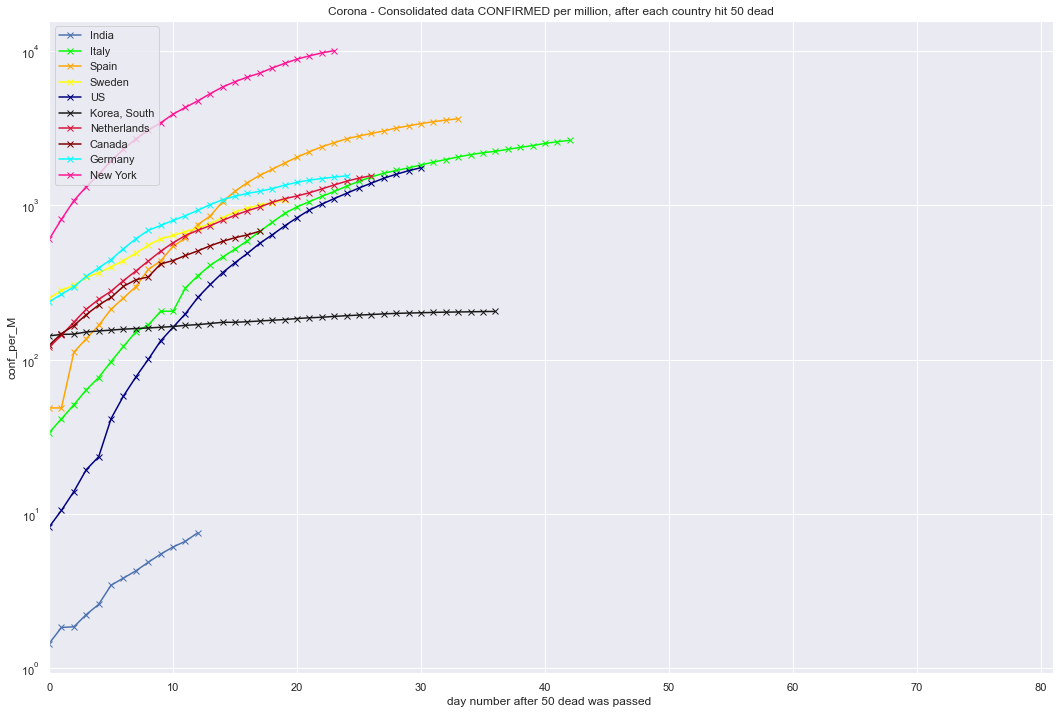

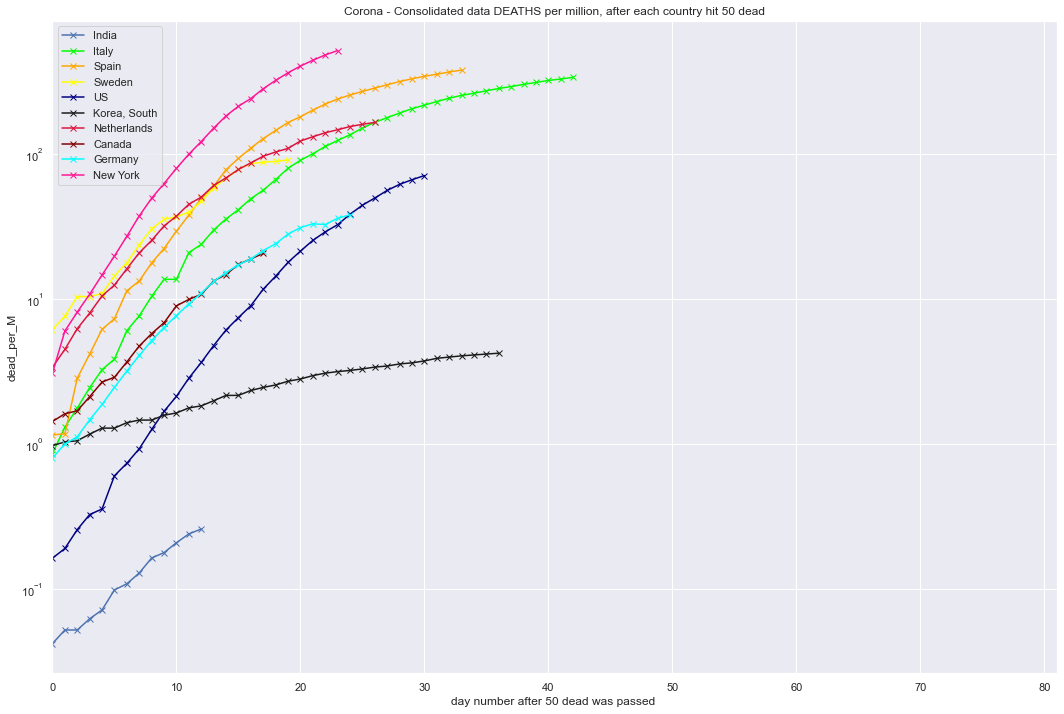

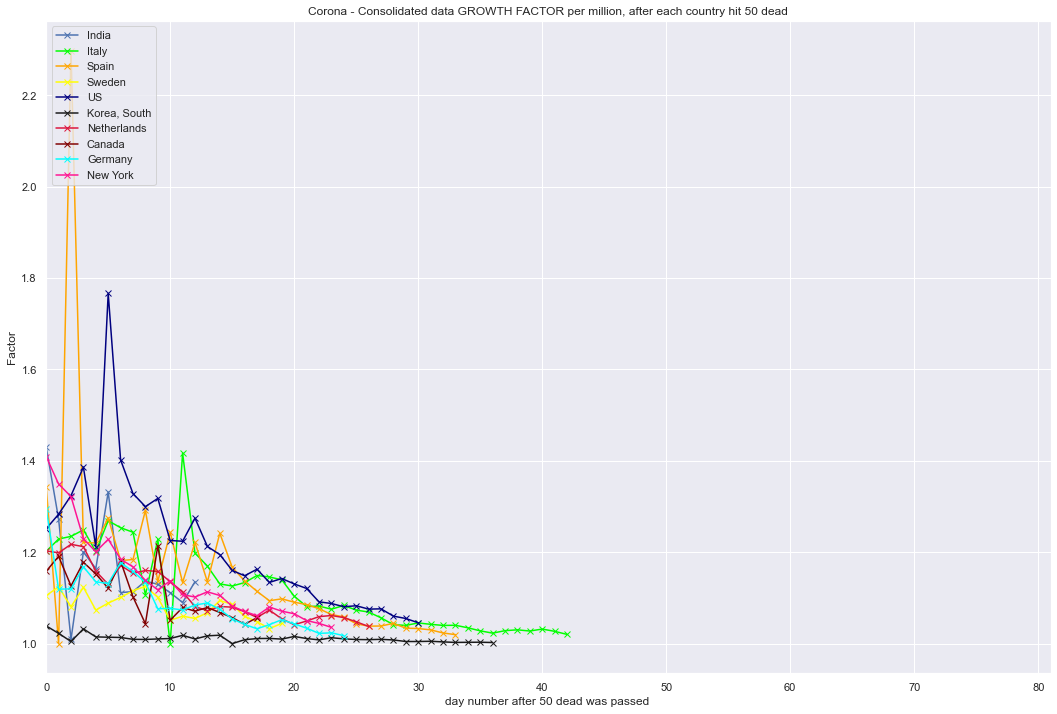

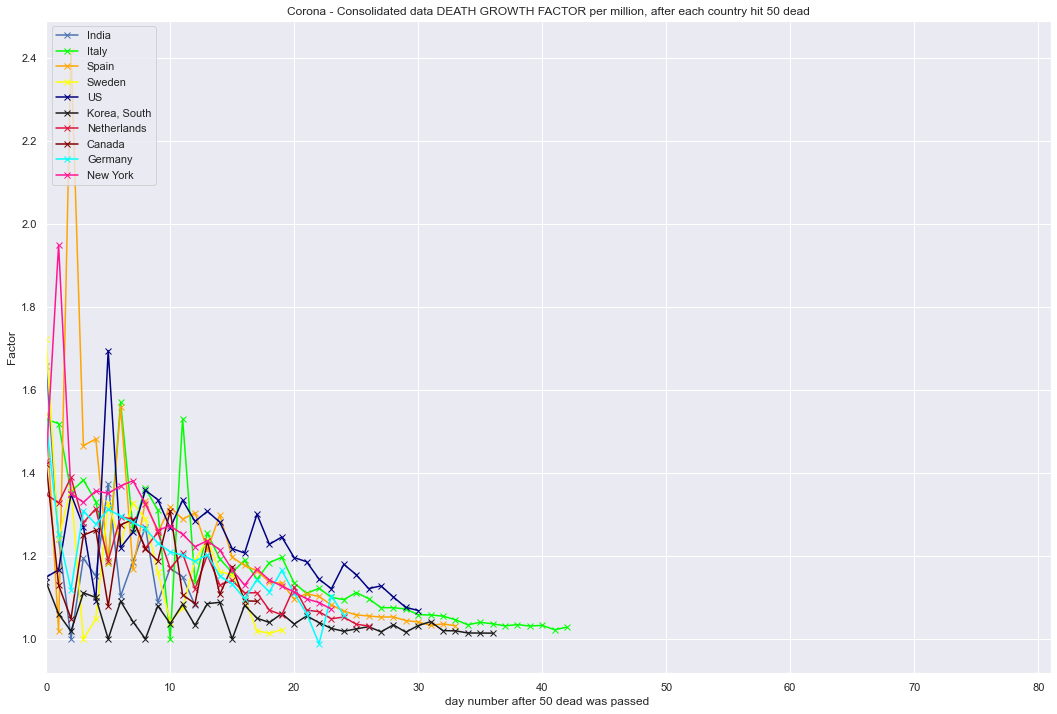

In [11]:

countries = ['India','Italy','Spain','Sweden','US',
             'Korea, South','Netherlands','Canada','Germany','New York']

#countries = ['Sweden_without_Stockholm','Finland','Norway','Denmark','Sweden','Iceland']


colors = ['b','lime','orange','yellow','navy','k','crimson','maroon','cyan','deeppink']


plt.figure(figsize=(18,12))
plt.title('Corona - Consolidated data CONFIRMED per million, after each country hit {} dead'.format(dead_min))
plt.yscale('log')

#longest history
max_x = len(dick['Italy'])

def process_country(country,param,color_idx):
    df = dick[country]
    
    try:
        df = df.drop(['dead_conf_ratio','conf_over_dead'],axis=1)
    except:
        print ('no cols dead_conf_ratio,conf_over_dead  for {} - skipping delete'.format(country))
   
    population = country_populations.loc[country,'population']
    df['conf_per_M'] = df['confirmed'] / (population / 1e6)
    df['dead_per_M'] = df['deceased'] / (population / 1e6)
    df['factor_per_M'] = df['conf_per_M'] / df['conf_per_M'].shift()
    df['factor_dead_per_M'] = df['dead_per_M'] / df['dead_per_M'].shift()
    
    mask = ( ( df['confirmed'] >= confirmed_min ) & ( df['deceased'] >= dead_min))
    df = df[mask]
    df.reset_index(inplace=True)
    
    #slope,intercept,_,_,_ = sps.linregress(df.index,df[param])
    #slope = np.log10(slope)
    #intercept = np.log10(intercept)
    
    #X = np.linspace(min(df.index) ,max(df.index),40)
    
    #plt.plot([X[i] * slope + intercept for i in range(len(X))],'--',color=colors[color_idx],
             #label=country +'_regression, slope:{:.2f} intercept:{:.2f}'.format(slope,intercept))
    
    plt.plot(df[param],'x-',label=country,color=colors[color_idx])
    
    plt.legend(loc='upper left')  
    
    if 'factor' in param:
        plt.ylabel('Factor')
    else:
        plt.ylabel('{}'.format(param))
        
    plt.xlabel('day number after {} dead was passed '.format(dead_min))
    plt.yscale('log')
    
    ### CHANGE LIMIT WHEN NEEDED ###
    plt.xlim([0,max_x])
    
    
    
param = 'conf_per_M'

for i,c in enumerate(countries):
    process_country(c,param,i)

plt.savefig('Corona_consolidated_min_confirmed.jpg',format='jpg')

plt.figure(figsize=(18,12))
plt.title('Corona - Consolidated data DEATHS per million, after each country hit {} dead'.format(dead_min))

param = 'dead_per_M'

for i,c in enumerate(countries):
    process_country(c,param,i)
  
plt.savefig('Corona_consolidated_min_dead.jpg',format='jpg')

plt.figure(figsize=(18,12))
plt.title('Corona - Consolidated data GROWTH FACTOR per million, after each country hit {} dead'.format(dead_min))

param = 'factor_per_M'

for i,c in enumerate(countries):
    process_country(c,param,i)
    plt.yscale('linear')
    
plt.savefig('Corona_consolidated_min_factor.jpg',format='jpg')

plt.figure(figsize=(18,12))
plt.title('Corona - Consolidated data DEATH GROWTH FACTOR per million, after each country hit {} dead'.format(dead_min))

param = 'factor_dead_per_M'

for i,c in enumerate(countries):
    process_country(c,param,i)
    plt.yscale('linear')
    
    
plt.savefig('Corona_consolidated_dead_min_factor.jpg',format='jpg')


no cols dead_conf_ratio,conf_over_dead  for New York - skipping delete
no cols dead_conf_ratio,conf_over_dead  for New York - skipping delete


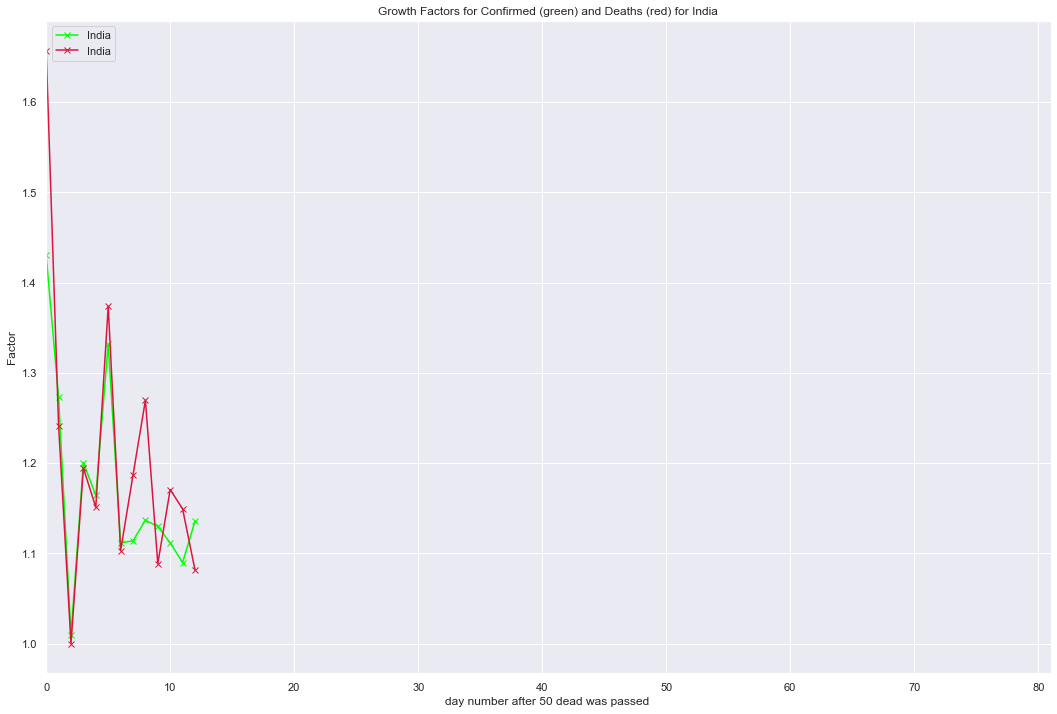

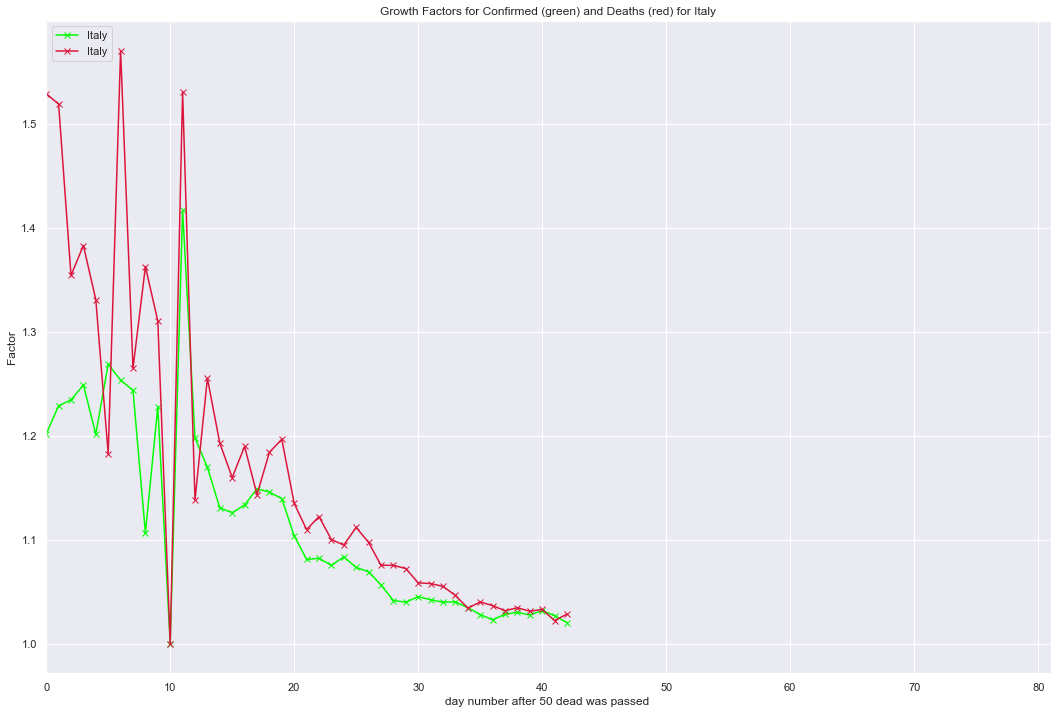

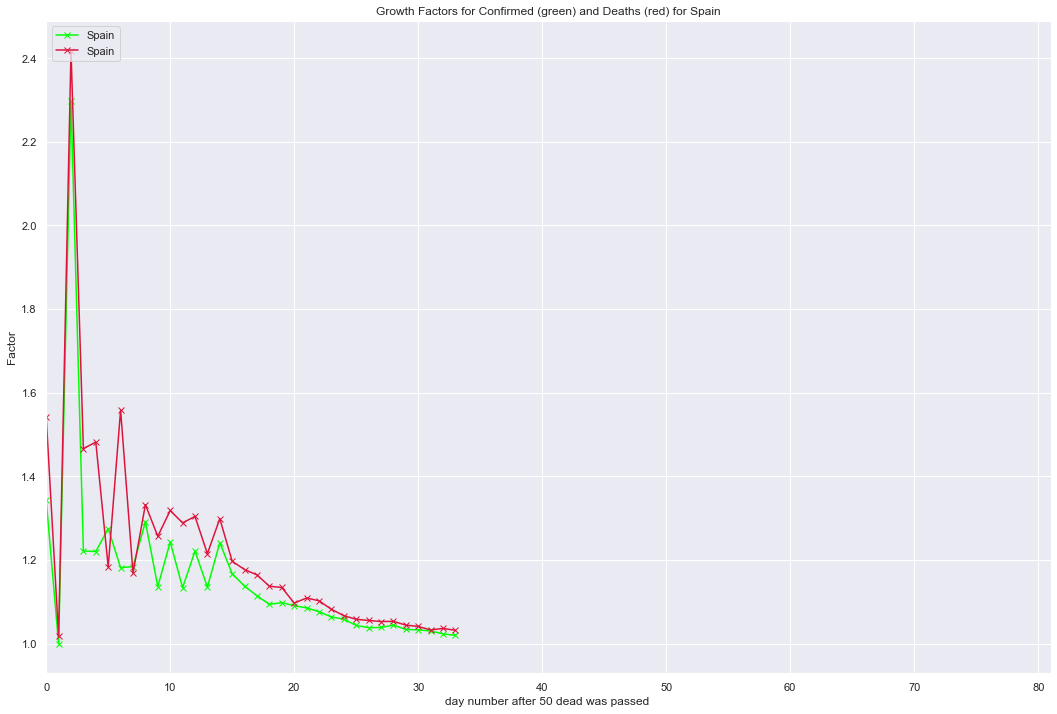

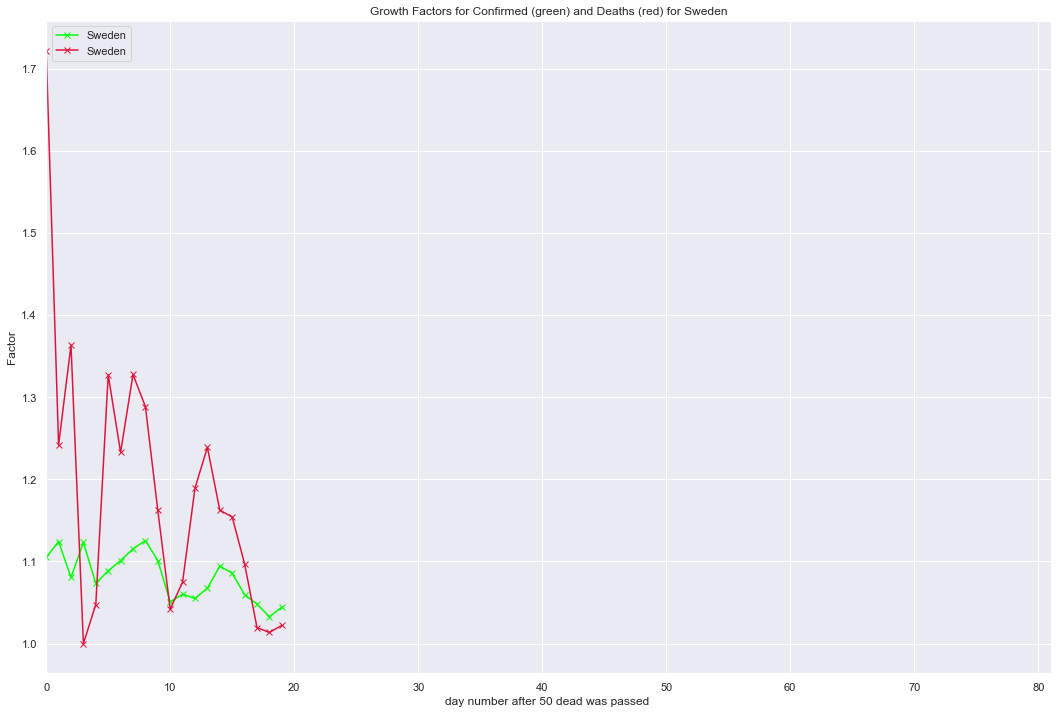

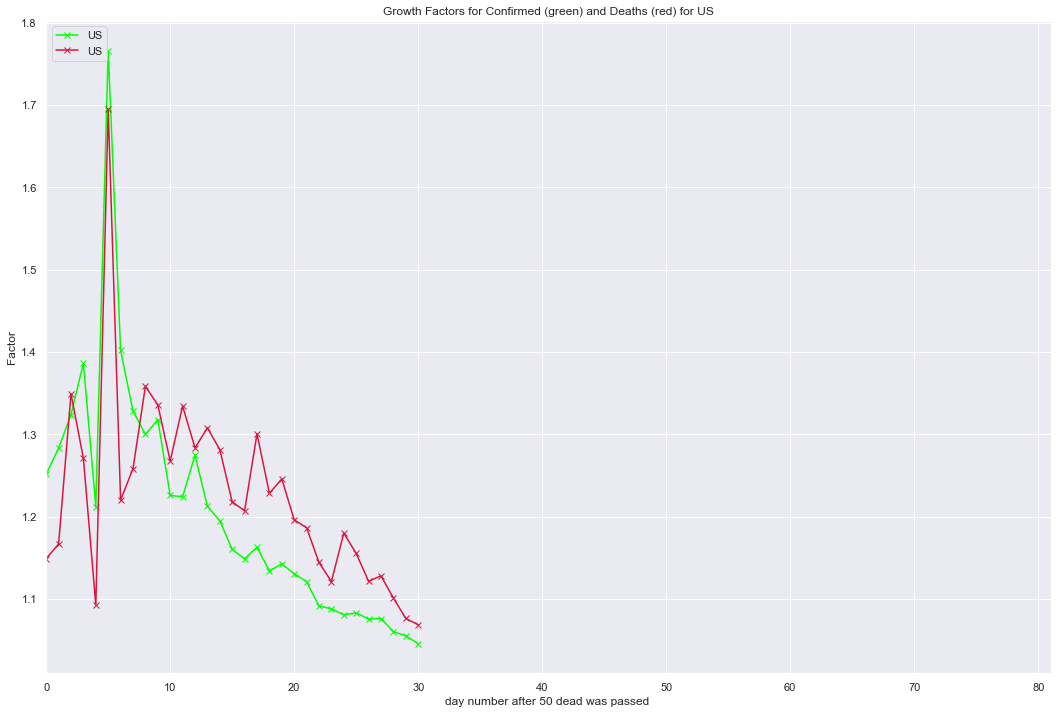

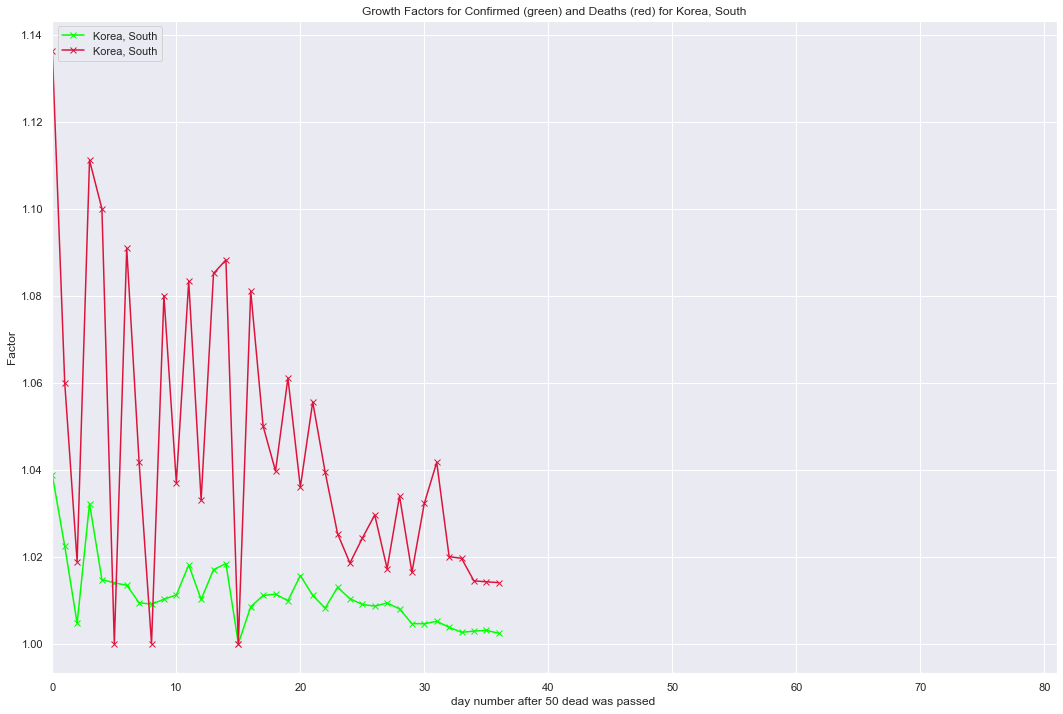

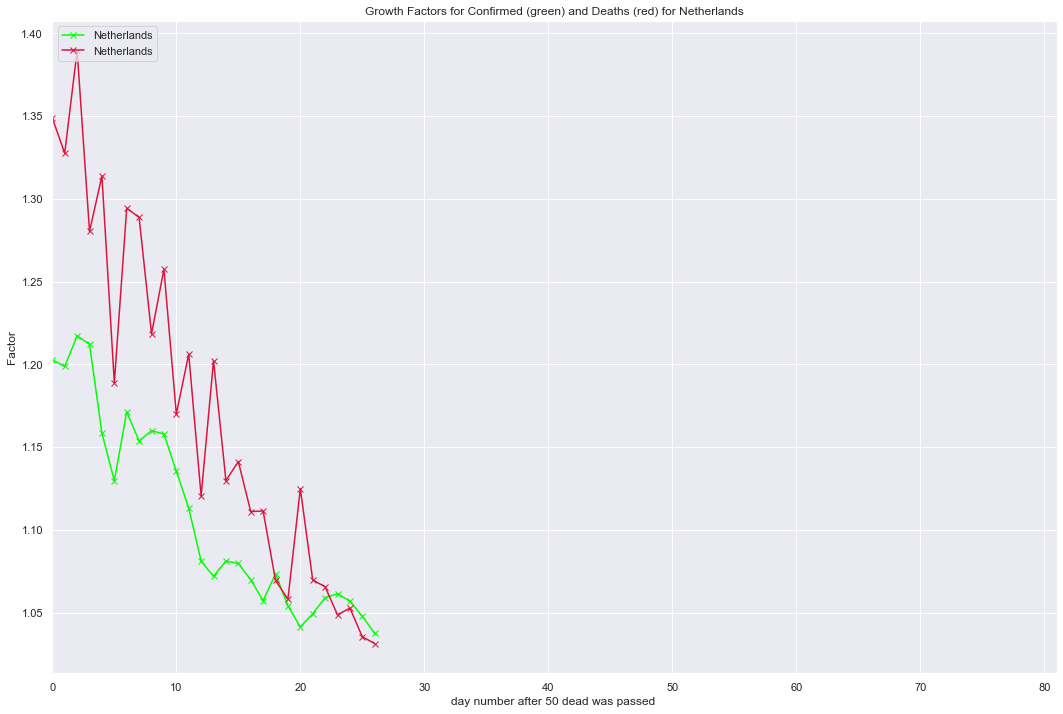

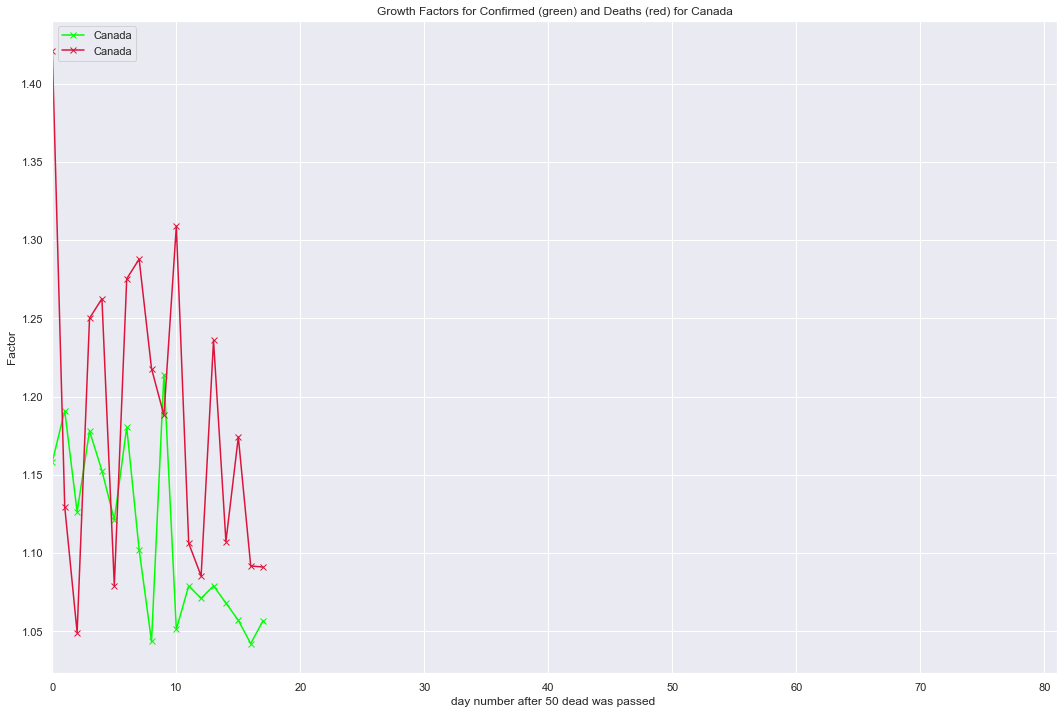

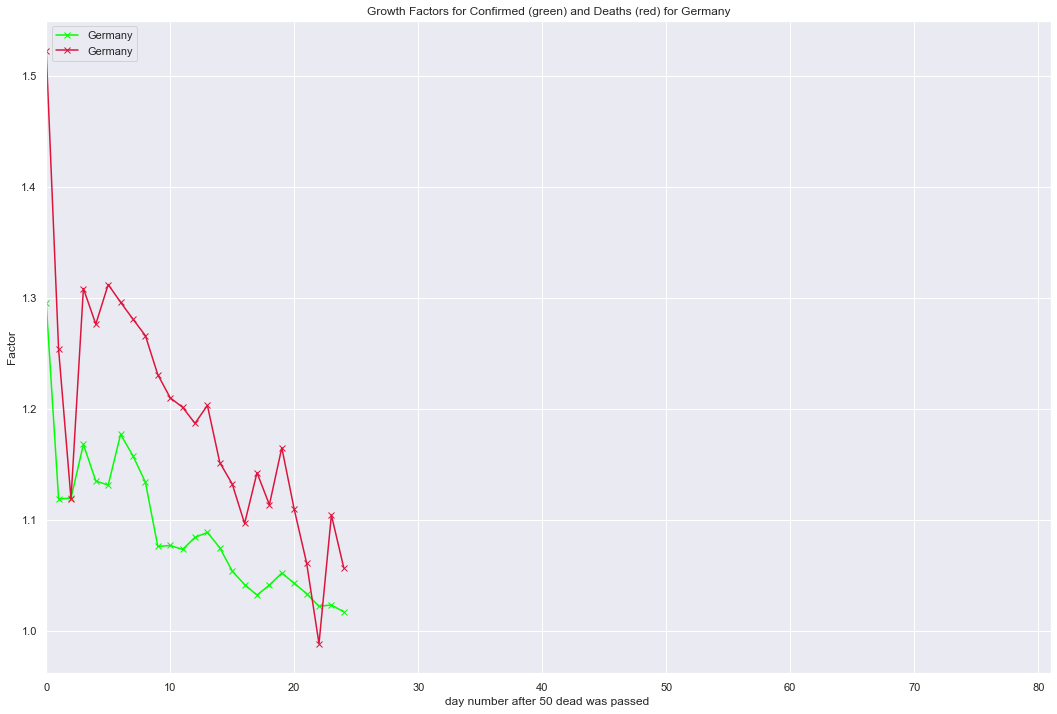

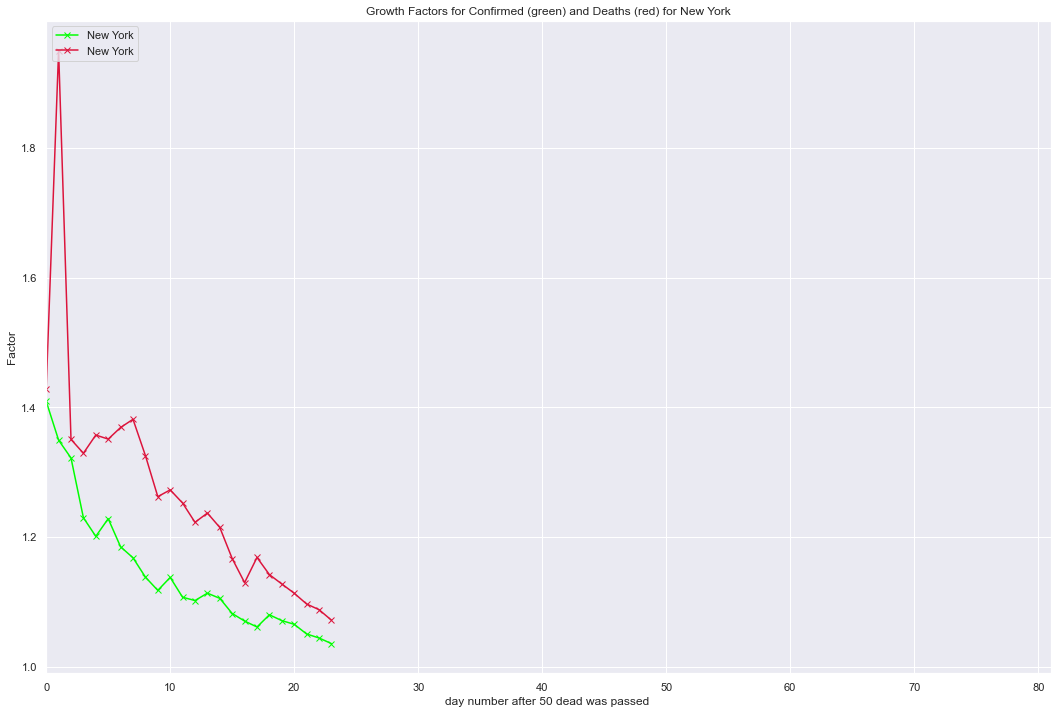

In [12]:
for i,c in enumerate(countries):
    plt.figure(figsize=(18,12))
    plt.title('Growth Factors for Confirmed (green) and Deaths (red) for {}'.format(c))
    
    process_country(c,'factor_per_M',1)
    process_country(c,'factor_dead_per_M',6)
    plt.yscale('linear')
    plt.savefig('Growth_factors_for_{}.jpg'.format(c),format='jpg')

 [-----------------100%-----------------] 100000 of 100000 complete in 127.8 sec
          beta_post    alpha_post
count  25000.000000  25000.000000
mean       0.906689      0.000630
std        0.148135      0.141396
min        0.143649     -0.748841
25%        0.814776     -0.087864
50%        0.907731      0.001630
75%        0.999763      0.090590
max        1.651187      0.688714
 [-----------------100%-----------------] 100000 of 100000 complete in 133.5 sec
          beta_post    alpha_post
count  25000.000000  25000.000000
mean       0.862366     -0.000408
std        0.081138      0.080620
min        0.544077     -0.375881
25%        0.806734     -0.053541
50%        0.862160      0.001078
75%        0.916587      0.052724
max        1.238797      0.316649
 [-----------------100%-----------------] 100000 of 100000 complete in 137.6 sec
          beta_post    alpha_post
count  25000.000000  25000.000000
mean       0.942304      0.000420
std        0.062483      0.061835
min      

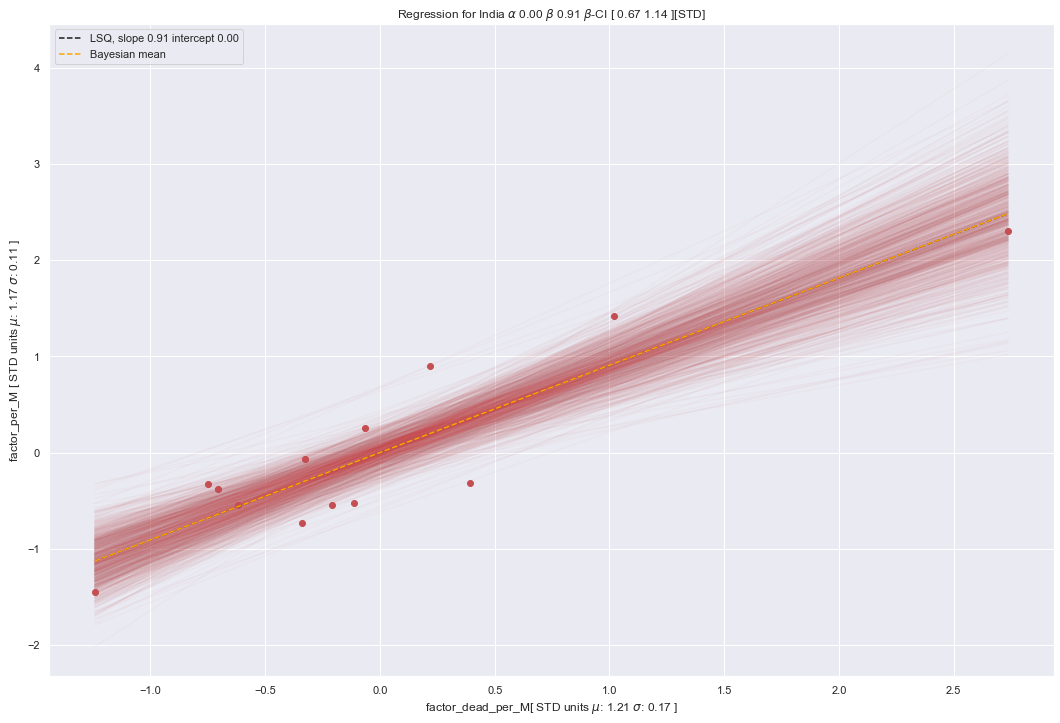

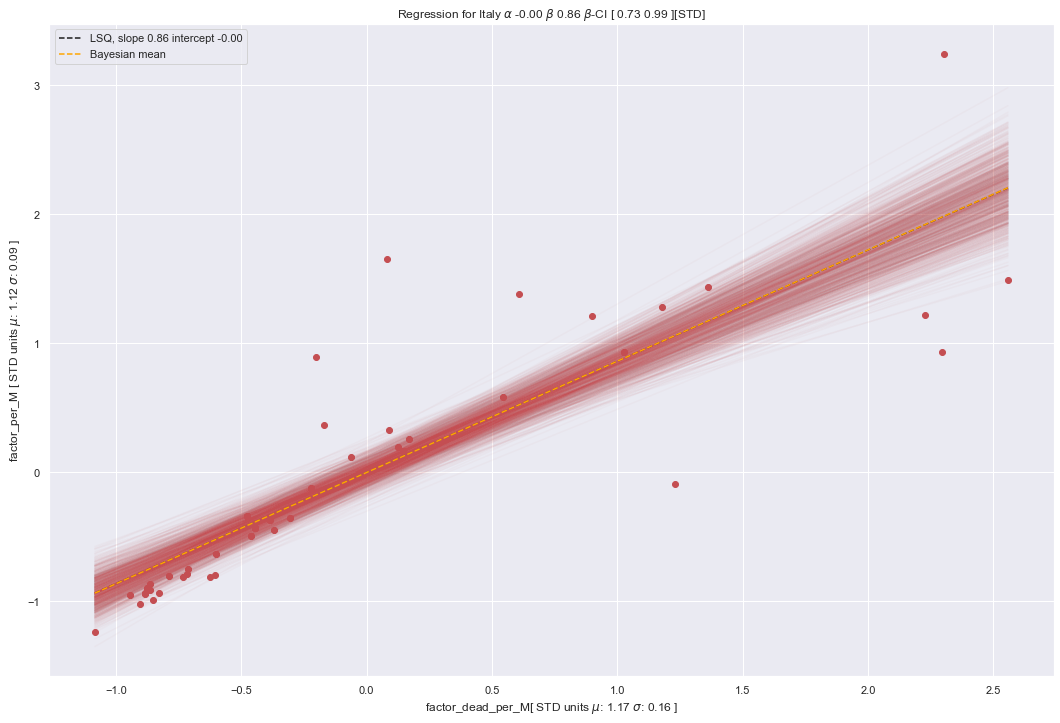

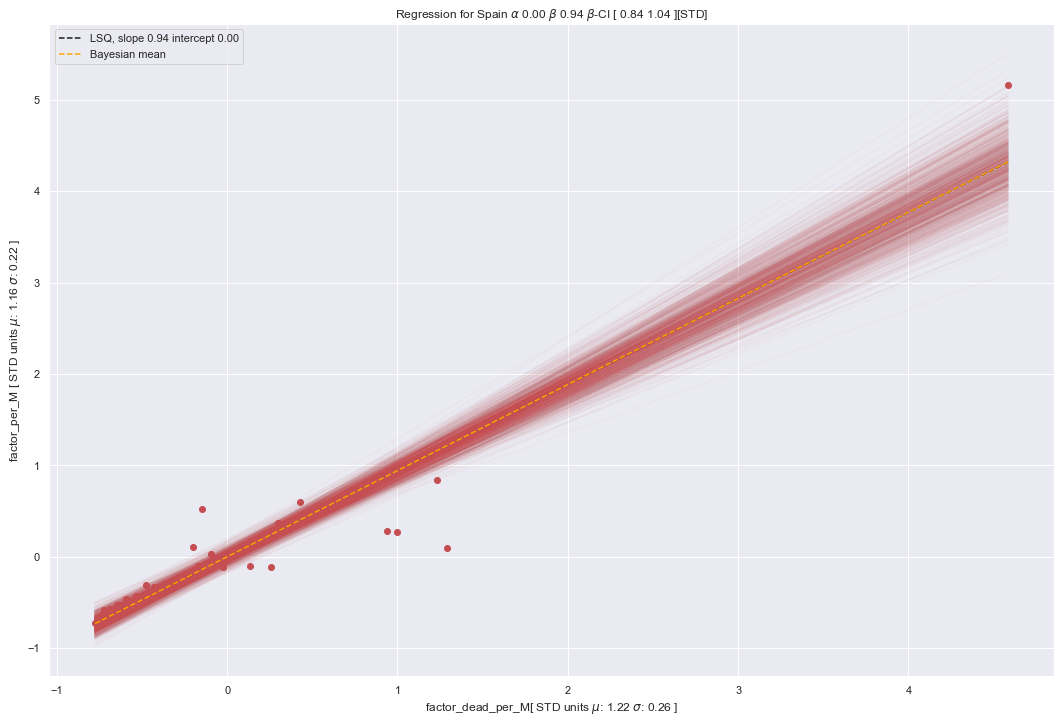

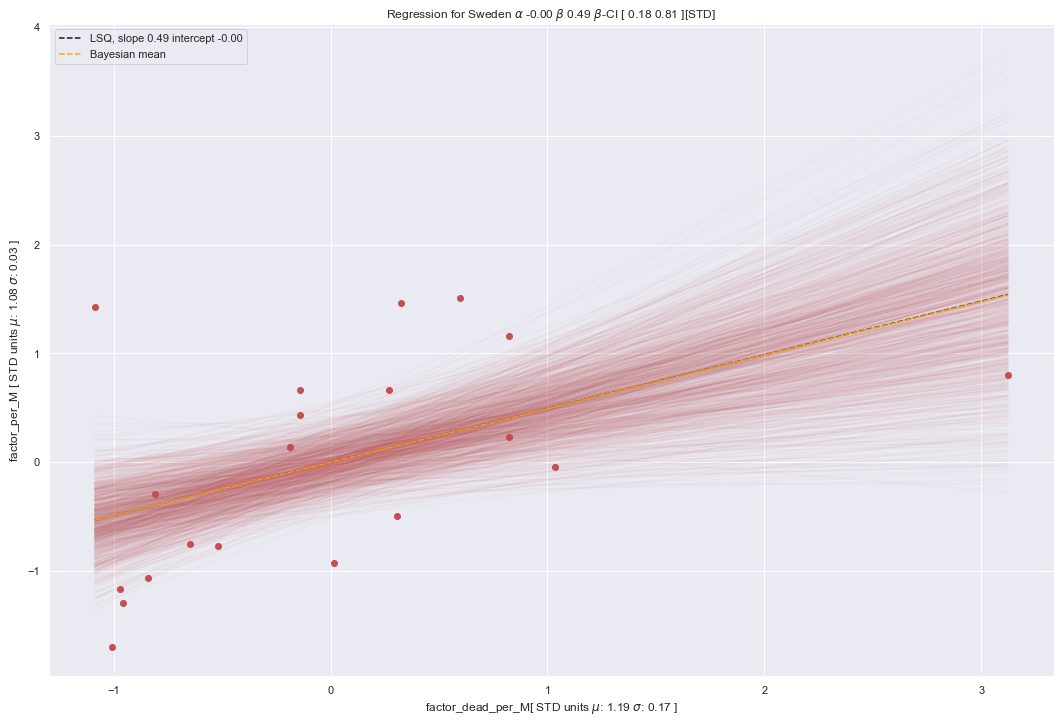

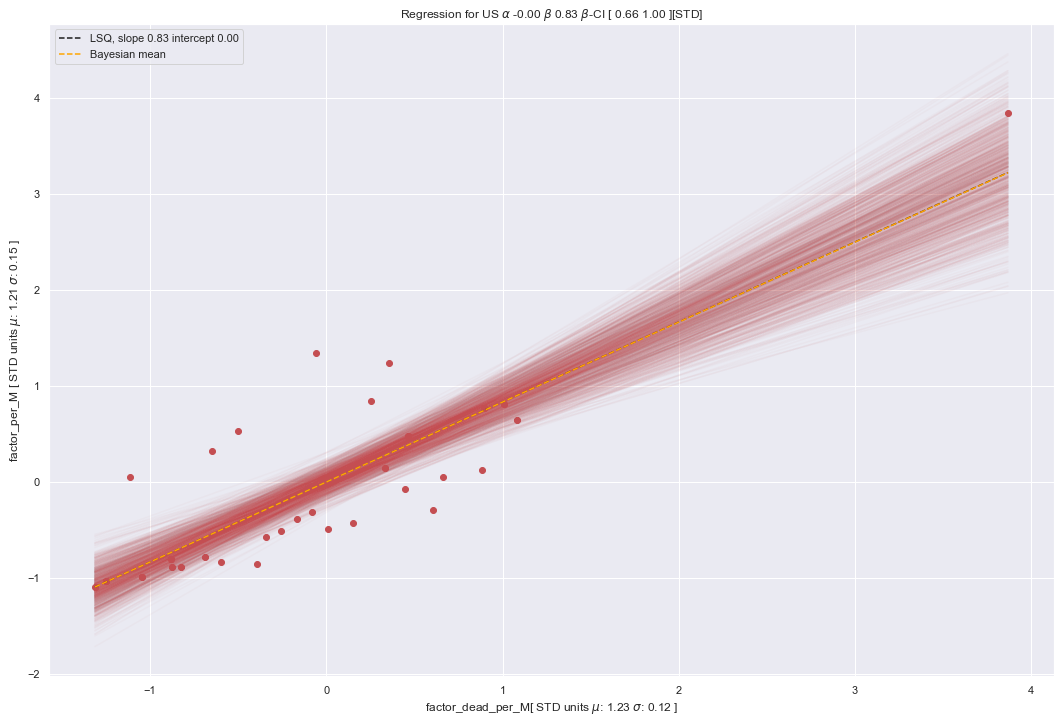

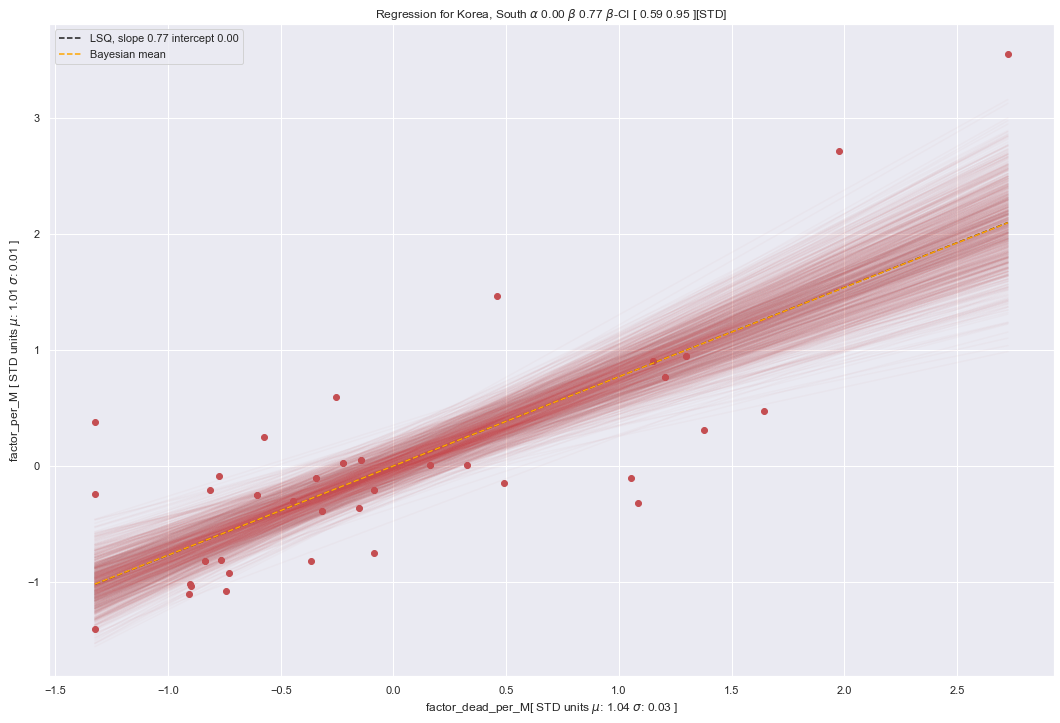

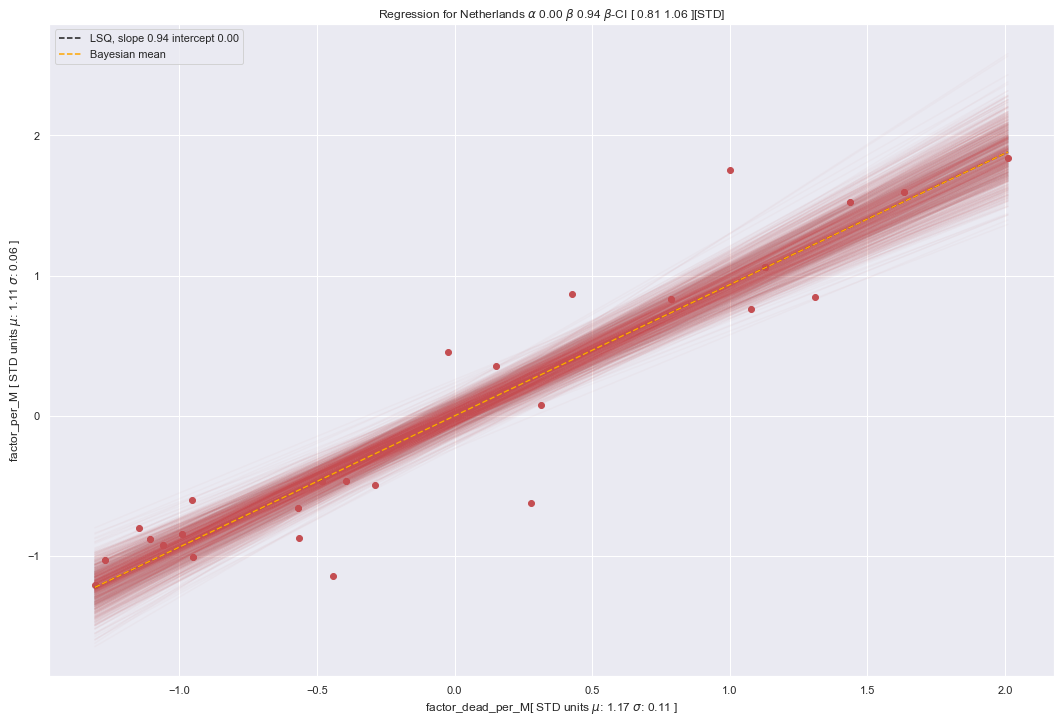

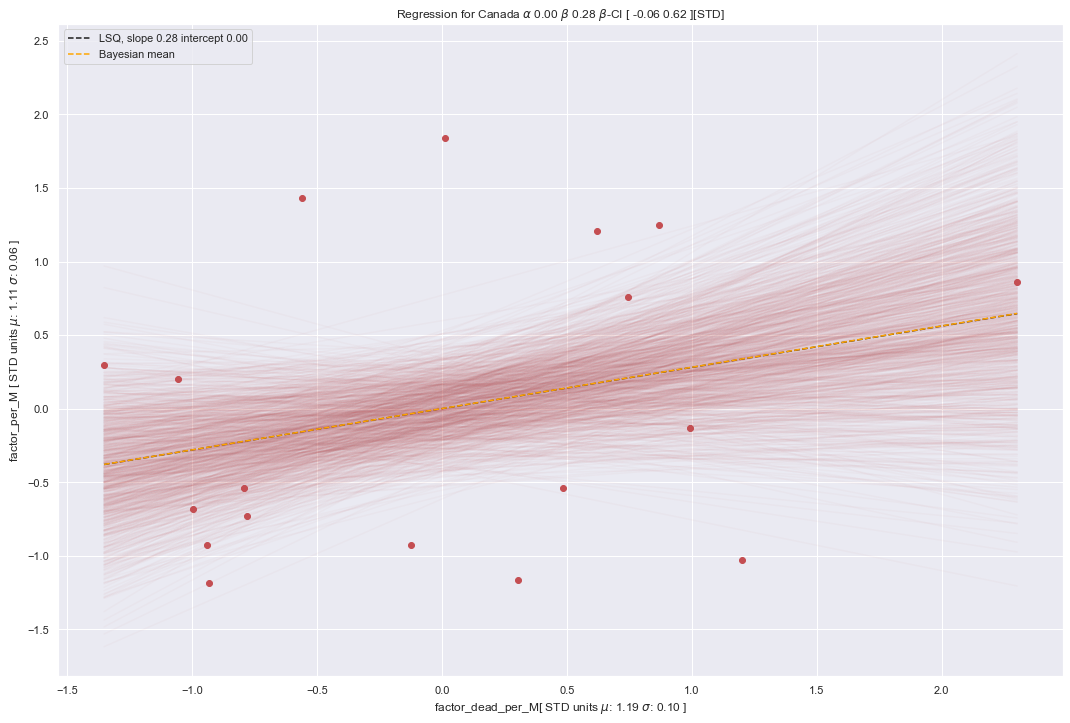

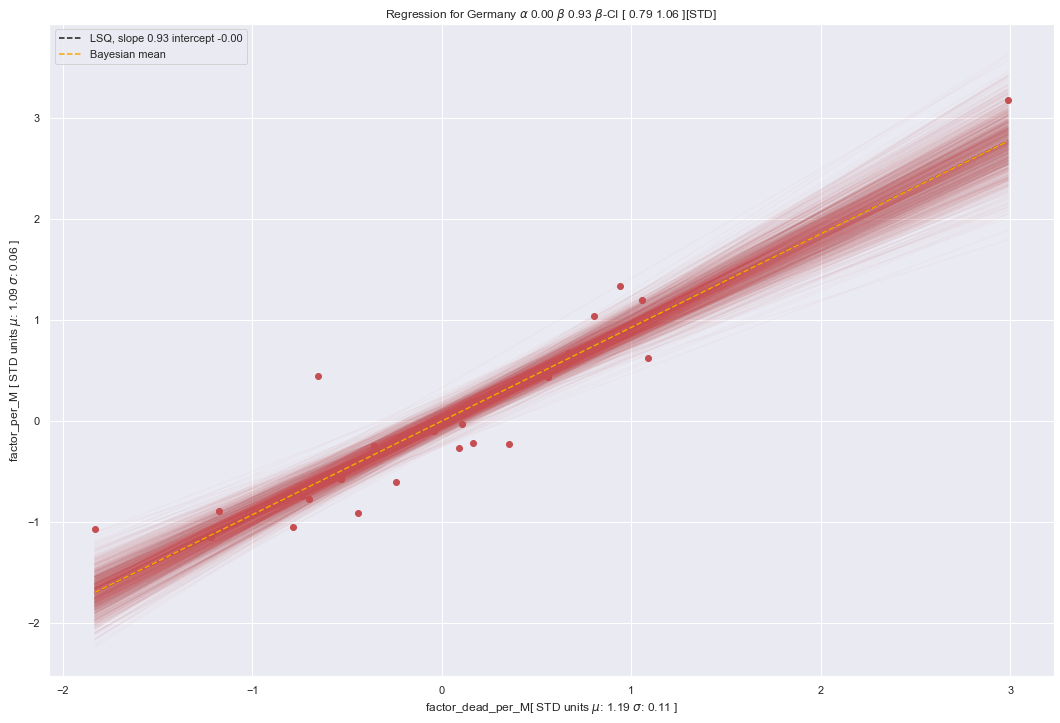

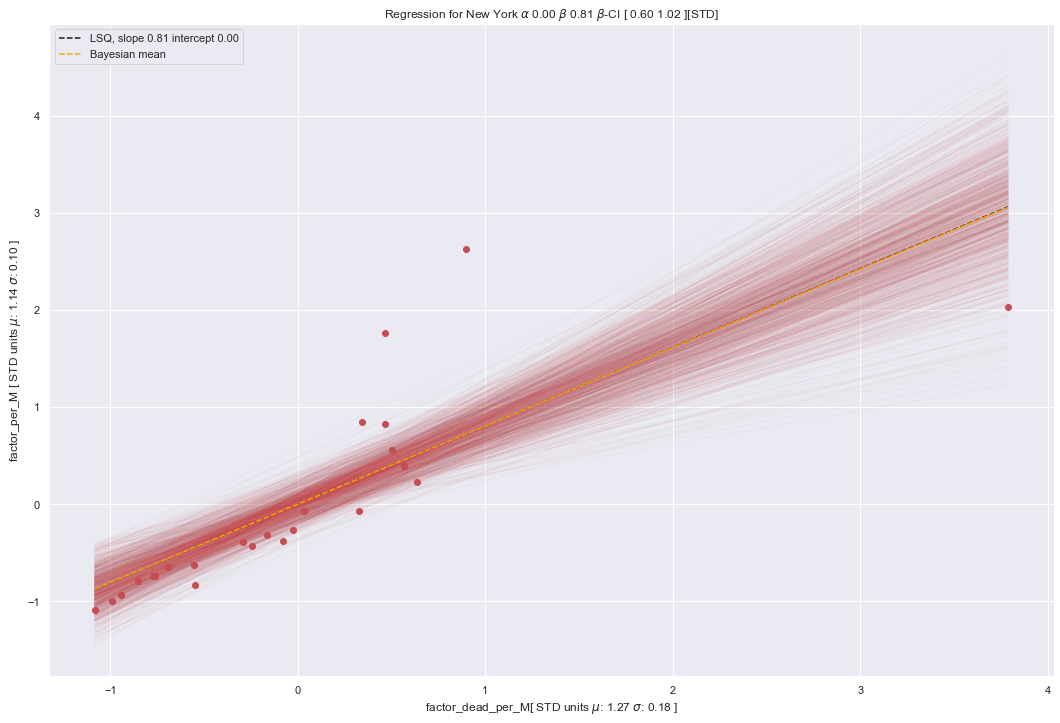

In [13]:
x_param = 'factor_dead_per_M'
y_param = 'factor_per_M'

def regression(x,y,country):
    
    def standardize(x):
        return (x - x.mean()) / x.std()
    
    x_org = x
    y_org = y
    
    x = standardize(x)
    y = standardize(y)
    
    plt.figure(figsize=(18,12))
    plt.ylabel(y_param + r' [ STD units $\mu$: {:.2f} $\sigma$: {:.2f} ]'.format(y_org.mean(),y_org.std()))
    plt.xlabel(x_param + r'[ STD units $\mu$: {:.2f} $\sigma$: {:.2f} ]'.format(x_org.mean(),x_org.std()))
    plt.scatter(x,y,color='r')
    
    slope,intercept,_,_,_ = sps.linregress(x,y)
    
    X = np.linspace(min(x),max(x),1000)
    
    plt.plot(X,[X[i] * slope + intercept for i in range(len(X))], color='k',ls='dashed',
            label='LSQ, slope {:.2f} intercept {:.2f}'.format(slope,intercept))
    
    
    beta_mu = pm.Uniform('beta_mu',0,0.5)
    beta_sigma = pm.Uniform('beta_sigma',0,0.1)
    alpha_mu = pm.Uniform('alpha_mu', 0, 0.5)
    alpha_sigma = pm.Uniform('alpha_sigma',0,0.1)
    
    beta = pm.Normal('beta',beta_mu,beta_sigma / 1 ** 2)
    alpha = pm.Normal('alpha',alpha_mu,alpha_sigma / 1 ** 2)
    
    obs_sigma = pm.Uniform('obs_sigma',0,1)
    
    @pm.deterministic()
    def linreq(alpha=alpha,beta=beta,x=x):
        return x * beta + alpha
    
    obs = pm.Normal('linreq',linreq,1 / obs_sigma ** 2,observed=True,value=y)
    
    model = pm.Model([beta_mu,beta_sigma,alpha_mu,alpha_sigma,beta,alpha,linreq,obs,obs_sigma])
    
    try:
        map_ = pm.MAP(model)
        map_.fit()
    except:
        print ('cant fit {}'.format(country))
    
    mcmc = pm.MCMC(model)
    mcmc.sample(100000,50000,2)
    
    beta_post = mcmc.trace('beta')[:]
    alpha_post = mcmc.trace('alpha')[:]
    
    result = pd.DataFrame({'beta_post': beta_post,
                          'alpha_post' : alpha_post})
    
    print()
    print (result.describe())
    
    CI_89 = np.percentile(result.beta_post,[5.5,94.5])
    
    plt.title(r'Regression for {} $\alpha$ {:.2f} $\beta$ {:.2f} $\beta$-CI [ {:.2f} {:.2f} ]  [STD]'.format(
        country,result.alpha_post.mean(),result.beta_post.mean(),CI_89[0],CI_89[1]))

    
    beta_samples = np.random.choice(result.beta_post,replace=True,size=len(X))
    alpha_samples = np.random.choice(result.alpha_post,replace=True,size=len(X))
    
    lines = np.array([X[i] * beta_samples + alpha_samples for i in range(len(X))])
    plt.plot(X,lines,alpha=0.03,color='r')
    
    plt.plot(X,[X[i] * result.beta_post.mean() + result.alpha_post.mean() for i in range(len(X))],
             color='orange',ls='dashed',label='Bayesian mean')
 
    plt.legend(loc='upper left')
    
    plt.savefig('growth_factor_regression_{}.jpg'.format(country),format='jpg')
    
for country in countries:

    df = dick[country]
    
    try:
        df = df.drop(['dead_conf_ratio','conf_over_dead'],axis=1)
    except:
        print ('Skipping delete col for {}'.format(country))
        
    population = country_populations.loc[country,'population']
    df['conf_per_M'] = df['confirmed'] / (population / 1e6)
    df['dead_per_M'] = df['deceased'] / (population / 1e6)
    df['factor_per_M'] = df['conf_per_M'] / df['conf_per_M'].shift()
    df['factor_dead_per_M'] = df['dead_per_M'] / df['dead_per_M'].shift()
    
    mask = ( ( df['confirmed'] >= confirmed_min ) & ( df['deceased'] >= dead_min))
    df = df[mask]
    df = df.replace(np.inf,np.nan)
    df.dropna(inplace=True)
    df.reset_index(inplace=True)

    regression(df[x_param],df[y_param],country)


 [-----------------100%-----------------] 100000 of 100000 complete in 121.6 sec
          beta_post    alpha_post
count  25000.000000  25000.000000
mean       0.517416      0.002159
std        0.214178      0.207432
min       -0.369304     -0.835048
25%        0.373872     -0.136798
50%        0.518610      0.003110
75%        0.661874      0.137150
max        1.388093      0.840466


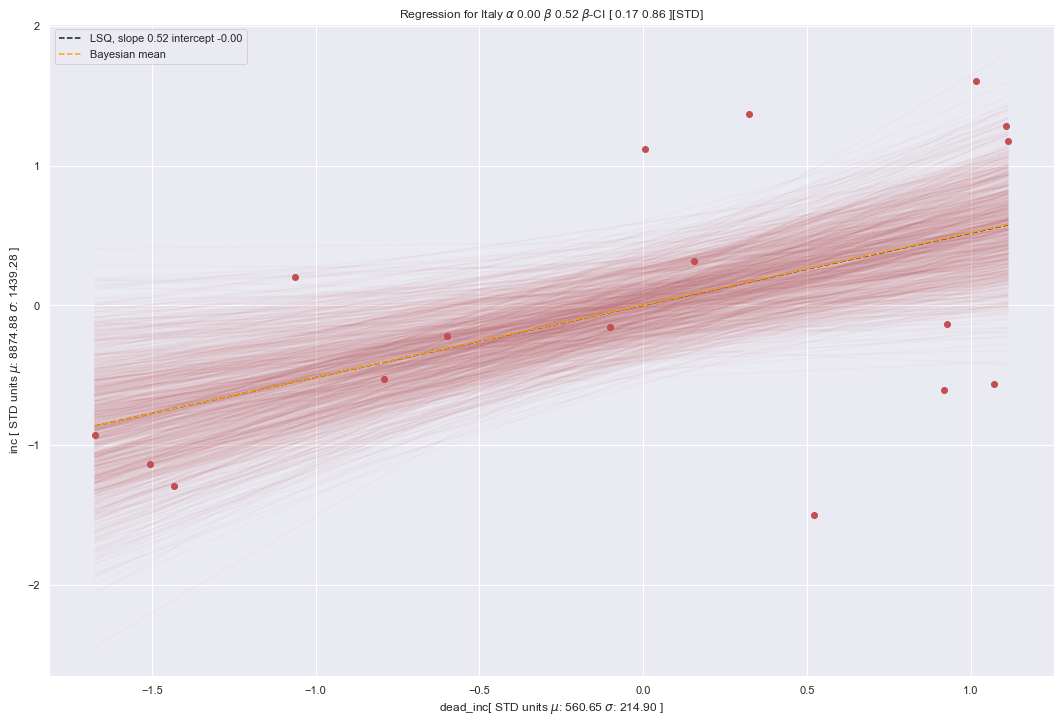

In [14]:
shifted_df = df.copy()
shifted_df[x_param] = shifted_df[x_param].shift(7)
shifted_df.dropna(inplace=True)

x_param = 'dead_inc'
y_param = 'inc'
regression(shifted_df[x_param],shifted_df[y_param],'Italy')

